# Vappar Internship Task 1 

    To produce a practicle implementation to analyse a large dataset. 

# Explanation of the dataset
    
    The dataset provided to us is from https://data.police.uk/ 
    
    which gives us the data of police cases of the UK from a single city.
    
    The dataset contains number of cases, solved cases or what the outcomes was the location of the crime, the police 
    
    station under which the location of crime comes.
    
    

# Important Things to do: 
    
    Analysis trends across years.(done, by 3 months gap)
    Analysis of within city. (done)
    Analysis of various types of crimes and their possible prevalence in certain locations (done).
    Predicting the likelihood of crime occurrence for one city.

# Importing Important Libraries

In [139]:
import pandas as pd
import os
import numpy as np 
from  matplotlib import pyplot as plt
#iportig datasets csv's 



df1 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2018-07-avon-and-somerset-street.csv")
df2 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2018-10-avon-and-somerset-street.csv")
df3 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2019-01-avon-and-somerset-street.csv")
df4 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2019-04-avon-and-somerset-street.csv")
df5 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2019-07-avon-and-somerset-street.csv")
df6 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2019-10-avon-and-somerset-street.csv")
df7 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2020-01-avon-and-somerset-street.csv")
df8 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2020-04-avon-and-somerset-street.csv")
df9 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2020-07-avon-and-somerset-street.csv")
df10 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2020-10-avon-and-somerset-street.csv")
df11 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2021-01-avon-and-somerset-street.csv")
df12 = pd.read_csv(r"E:/dataset/avon-and-somerset-street/2021-04-avon-and-somerset-street.csv")

#merging two datasets to get the result together 

#df3 = pd.concat([df1 , df2], ignore_index = True)

#df3
#df1['Crime type'].unique()


# Getting an idea about the shape of the dataset

In [140]:
df3.shape

(13575, 12)

# Getting all the information about the data frame 

In [141]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13575 entries, 0 to 13574
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               10973 non-null  object 
 1   Month                  13575 non-null  object 
 2   Reported by            13575 non-null  object 
 3   Falls within           13575 non-null  object 
 4   Longitude              11997 non-null  float64
 5   Latitude               11997 non-null  float64
 6   Location               13575 non-null  object 
 7   LSOA code              11997 non-null  object 
 8   LSOA name              11997 non-null  object 
 9   Crime type             13575 non-null  object 
 10  Last outcome category  10973 non-null  object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 1.2+ MB


# Types of crimes occuring all around the city 

In [88]:
df3['Crime type'].unique()

array(['Anti-social behaviour', 'Burglary',
       'Violence and sexual offences', 'Criminal damage and arson',
       'Public order', 'Vehicle crime', 'Other crime', 'Other theft',
       'Bicycle theft', 'Robbery', 'Drugs', 'Shoplifting',
       'Possession of weapons', 'Theft from the person'], dtype=object)

# Location with certain number of crimes in those locations 

In [106]:
print (df3.groupby(["Location"], as_index=False)["Crime type"].count())



                     Location  Crime type
0                 No Location        3795
1              On or near A30          12
2             On or near A303           7
3            On or near A3088           2
4            On or near A3259           3
...                       ...         ...
7054  On or near Zembard Lane           3
7055    On or near Zeta Close           1
7056  On or near Zetland Road          17
7057       On or near Zig Zag           2
7058     On or near Zion Hill           2

[7059 rows x 2 columns]


In [104]:
#13 crime types with the count of as many times as the outcome has occured


In [92]:
df3.groupby(['Crime type','Last outcome category']).sum()

Longitude  \
Crime type                   Last outcome category                                        
Bicycle theft                Court result unavailable                        -12.846424   
                             Formal action is not in the public interest      -2.473758   
                             Investigation complete; no suspect identified   -21.076426   
                             Local resolution                                 -2.523275   
                             Offender given a caution                         -4.964893   
...                                                                                 ...   
Violence and sexual offences Offender otherwise dealt with                   -15.583560   
                             Offender sent to prison                         -56.189196   
                             Status update unavailable                     -6994.635993   
                             Suspect charged as part of another case          -3.098034   
                             Unable to prosecute suspect                   -7956.224488   

                                                                                 Latitude  \
Crime type                   Last outcome category                                          
Bicycle theft                Court result unavailable                          257.252721   
                             Formal action is not in the public interest        51.246934   
                             Investigation complete; no suspect identified     410.772672   
                             Local resolution                                   51.477676   
                             Offender given a caution                          102.958434   
...                                                                                   ...   
Violence and sexual offences Offender otherwise dealt with                     308.850531   
                             Offender sent to prison                          1131.404078   
                             Status update unavailable                      133889.549986   
                             Suspect charged as part of another case            51.034685   
                             Unable to prosecute suspect                    150597.330834   

                                                                            Context  
Crime type                   Last outcome category                                   
Bicycle theft                Court result unavailable                           0.0  
                             Formal action is not in the public interest        0.0  
                             Investigation complete; no suspect identified      0.0  
                             Local resolution                                   0.0  
                             Offender given a caution                           0.0  
...                                                                             ...  
Violence and sexual offences Offender otherwise dealt with                      0.0  
                             Offender sent to prison                            0.0  
                             Status update unavailable                          0.0  
                             Suspect charged as part of another case            0.0  
                             Unable to prosecute suspect                        0.0  

[196 rows x 3 columns]

In [93]:
df3.describe(include="all")

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
count,24776,32122,32122,32122,28327.000000,28327.000000,32122,28327,28327,32122,24776,0.0
unique,24018,2,1,1,NaN,NaN,7059,1048,1048,14,26,NaN
top,0ca69e943a9596981a95882c551bb081c4a99bf00f78ce...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,E01014540,Bristol 032B,Violence and sexual offences,Status update unavailable,NaN
freq,5,16787,32122,32122,NaN,NaN,3795,912,912,8976,13546,NaN
mean,NaN,NaN,NaN,NaN,-2.683772,51.334904,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.234696,0.185944,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-4.310555,50.508734,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,-2.852937,51.209263,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,-2.597992,51.415331,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,-2.549521,51.462616,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
var = df3['Crime type'].count()
print (var)

32122


In [96]:
var2 = df3['Last outcome category'].count()
print (var2)

24776


In [97]:
#calculating percentage of solved cases 
percentage = var2 / var
percent = percentage * 100 
print (percent)

77.13093829773987


# Trends Across Years 
    For this purpose I have given a gap of 3 months and followed the trend in this way. 

# Making a single dataset 

In [112]:
bigdata = pd.concat([df1 , df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index = True)
bigdata

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511761,51.409966,On or near Caernarvon Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,NaN,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
2,89f52ee613e8fa7bd0e326c427583097ce0195a20ac080...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511761,51.409966,On or near Caernarvon Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,NaN
3,11635a452d984230d368f5bbbfa0d270de33d84c363a2f...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509930,51.410873,On or near Ludlow Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
4,151825317eaef54ba52fb1d19828f1f01a60ce51727501...,2018-07,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Court result unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
169919,16981c88623a28eb664a54b621fc7bcdb5b5ad21eb202b...,2021-04,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Unable to prosecute suspect,NaN
169920,f4119de4bf65e535475c57f4ce25084630d9808211cae1...,2021-04,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
169921,1167876d105a596e597e618681faced8afe8ee67540e96...,2021-04,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
169922,b55693a47bf5ee48571069a11aef7b3d3167c65a77443a...,2021-04,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [119]:
var = bigdata.groupby(['Month']).count()
#var.to_csv('trend.csv', index=False) convesion to csv just for your own understanding 
var

,Crime ID,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
Month,,,,,,,,,,,
2018-07,12940,16787,16787,14734,14734,16787,14734,14734,16787,12940,0
2018-10,11905,15075,15075,13417,13417,15075,13417,13417,15075,11905,0
2019-01,10973,13575,13575,11997,11997,13575,11997,11997,13575,10973,0
2019-04,11849,14608,14608,13028,13028,14608,13028,13028,14608,11849,0
2019-07,13035,16595,16595,14795,14795,16595,14795,14795,16595,13035,0
2019-10,12066,14883,14883,13270,13270,14883,13270,13270,14883,12066,0
2020-01,12154,14484,14484,13236,13236,14484,13236,13236,14484,12154,0
2020-04,8617,11039,11039,10317,10317,11039,10317,10317,11039,8617,0
2020-07,12064,15937,15937,14913,14913,15937,14913,14913,15937,12064,0


In [135]:
yaxis = var['Crime type']
yaxis
yaxis2 = var['Last outcome category']
yaxis2

Month
2018-07    12940
2018-10    11905
2019-01    10973
2019-04    11849
2019-07    13035
2019-10    12066
2020-01    12154
2020-04     8617
2020-07    12064
2020-10    10650
2021-01     8522
2021-04    10147
Name: Last outcome category, dtype: int64

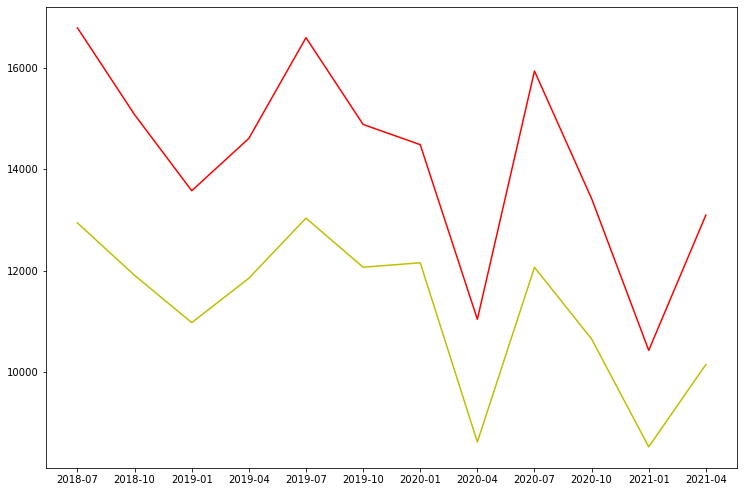

In [138]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.6,1.6])
myaxes.plot(yaxis,'r',label= 'Number of crimes')
myaxes.plot(yaxis2,'y',label= 'solved cases')

In [ ]:
#the above trend shows us that the number of crimes increases in summer and fall and decreses as soon as the winter arrives.
#it also shows the performance of the polioce by the number of cases their has been an outcome.

# Analysis within city 

In [146]:
var2 = bigdata.groupby(['Location']).count()
var2

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Context
Location,,,,,,,,,,,
No Location,15520,15520,15520,15520,0,0,0,0,15520,15520,0
On or near A219,1,1,1,1,1,1,1,1,1,1,0
On or near A30,34,35,35,35,35,35,35,35,35,34,0
On or near A303,39,40,40,40,40,40,40,40,40,39,0
On or near A3066,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
On or near Zermatt Mount,1,1,1,1,1,1,1,1,1,1,0
On or near Zeta Close,8,10,10,10,10,10,10,10,10,8,0
On or near Zetland Road,131,159,159,159,159,159,159,159,159,131,0


In [150]:
yaxis3 = var2['Crime type']
yaxis3

Location
No Location                 15520
On or near A219                 1
On or near A30                 35
On or near A303                40
On or near A3066                2
                            ...  
On or near Zermatt Mount        1
On or near Zeta Close          10
On or near Zetland Road       159
On or near Zig Zag              6
On or near Zion Hill            5
Name: Crime type, Length: 12592, dtype: int64

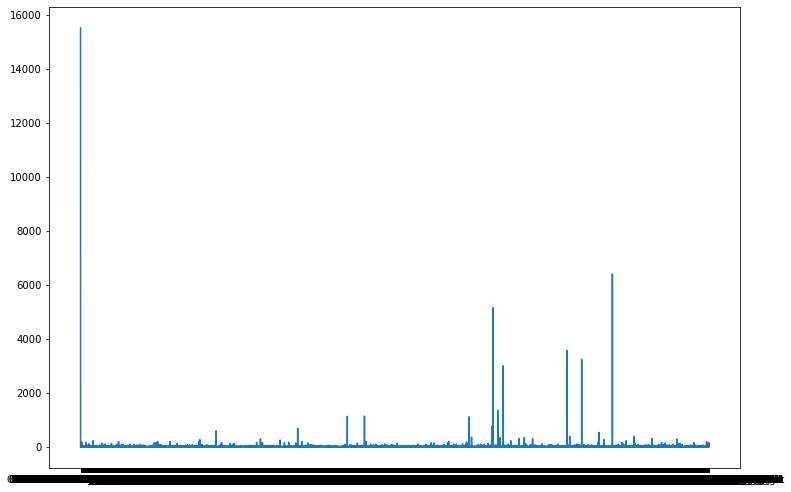

In [156]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.6,1.6])
myaxes.plot(yaxis3)

# Likelihood of crime ocurance 

In [160]:
# now we have to make a prediction of the liklihood of crime occurance.
